In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report

In [2]:
dataSet = pd.read_csv('./Admission_Predict.csv')

In [3]:
dataSet

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:

threshold = 0.7

dataSet['Chance of Admit ']

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [5]:

dataSet['Admitted'] = ((dataSet['Chance of Admit ']) >= threshold).astype(int)


# Save the modified dataset
dataSet.to_csv('./Admission_Modified.csv', index=False)

In [6]:
Modified_Data = pd.read_csv('./Admission_Modified.csv')
Modified_Data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admitted
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,1
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0
...,...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82,1
396,397,325,107,3,3.0,3.5,9.11,1,0.84,1
397,398,330,116,4,5.0,4.5,9.45,1,0.91,1
398,399,312,103,3,3.5,4.0,8.78,0,0.67,0


In [7]:
X = Modified_Data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]

# Target (y) - 'Admitted'
y = Modified_Data['Admitted']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
157,309,104,2,2.0,2.5,8.26,0
109,304,103,5,5.0,4.0,8.64,0
17,319,106,3,4.0,3.0,8.00,1
347,299,94,1,1.0,1.0,7.34,0
24,336,119,5,4.0,3.5,9.80,1
...,...,...,...,...,...,...,...
71,336,112,5,5.0,5.0,9.76,1
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0


In [19]:
dt_classifier_gini = DecisionTreeClassifier(random_state=1,criterion='gini',splitter='best',max_leaf_nodes=None)
dt_classifier_entropy = DecisionTreeClassifier(random_state=1,criterion='entropy',splitter='best',max_leaf_nodes=None)

In [20]:
dt_classifier_gini.fit(X_train, y_train)
dt_classifier_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [12]:
y_test_pred1 = dt_classifier_gini.predict(X_test)
y_train_pred1 = dt_classifier_gini.predict(X_train)

y_test_pred2 = dt_classifier_entropy.predict(X_test)
y_train_pred2 = dt_classifier_entropy.predict(X_train)

In [13]:
print("Confusion Matrix Testing by Model based on GINI")
print(classification_report(y_test,y_test_pred1));print()
print("Confusion Matrix Testing by Model based on ENTROPY")
print(classification_report(y_test,y_test_pred2));print()
print("Confusion Matrix Training by Model based on GINI")
print(classification_report(y_train,y_train_pred1));print()
print("Confusion Matrix Traniing by Model based on ENTROPY")
print(classification_report(y_train,y_train_pred2));print()

Confusion Matrix Testing by Model based on GINI
              precision    recall  f1-score   support

           0       0.74      0.71      0.73        52
           1       0.79      0.81      0.80        68

    accuracy                           0.77       120
   macro avg       0.76      0.76      0.76       120
weighted avg       0.77      0.77      0.77       120


Confusion Matrix Testing by Model based on ENTROPY
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        52
           1       0.82      0.82      0.82        68

    accuracy                           0.80       120
   macro avg       0.80      0.80      0.80       120
weighted avg       0.80      0.80      0.80       120


Confusion Matrix Training by Model based on GINI
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00       179

    accuracy                    

Accuracy Score :  0.7666666666666667


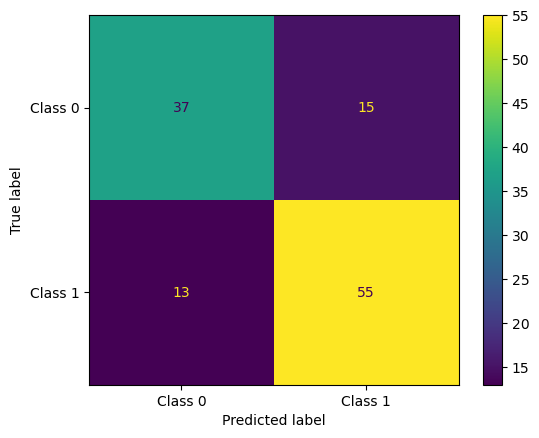

In [14]:
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred1,display_labels=['Class 0', 'Class 1'])
plt.show
print("Accuracy Score : ",accuracy_score(y_test,y_test_pred1))

Accuracy Score :  0.8


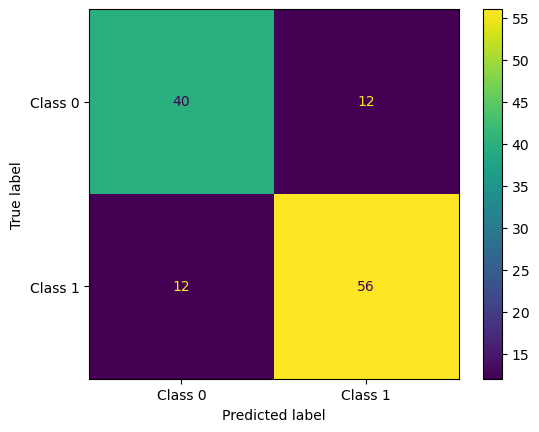

In [15]:
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred2,display_labels=['Class 0', 'Class 1'])
plt.show
print("Accuracy Score : ",accuracy_score(y_test,y_test_pred2))

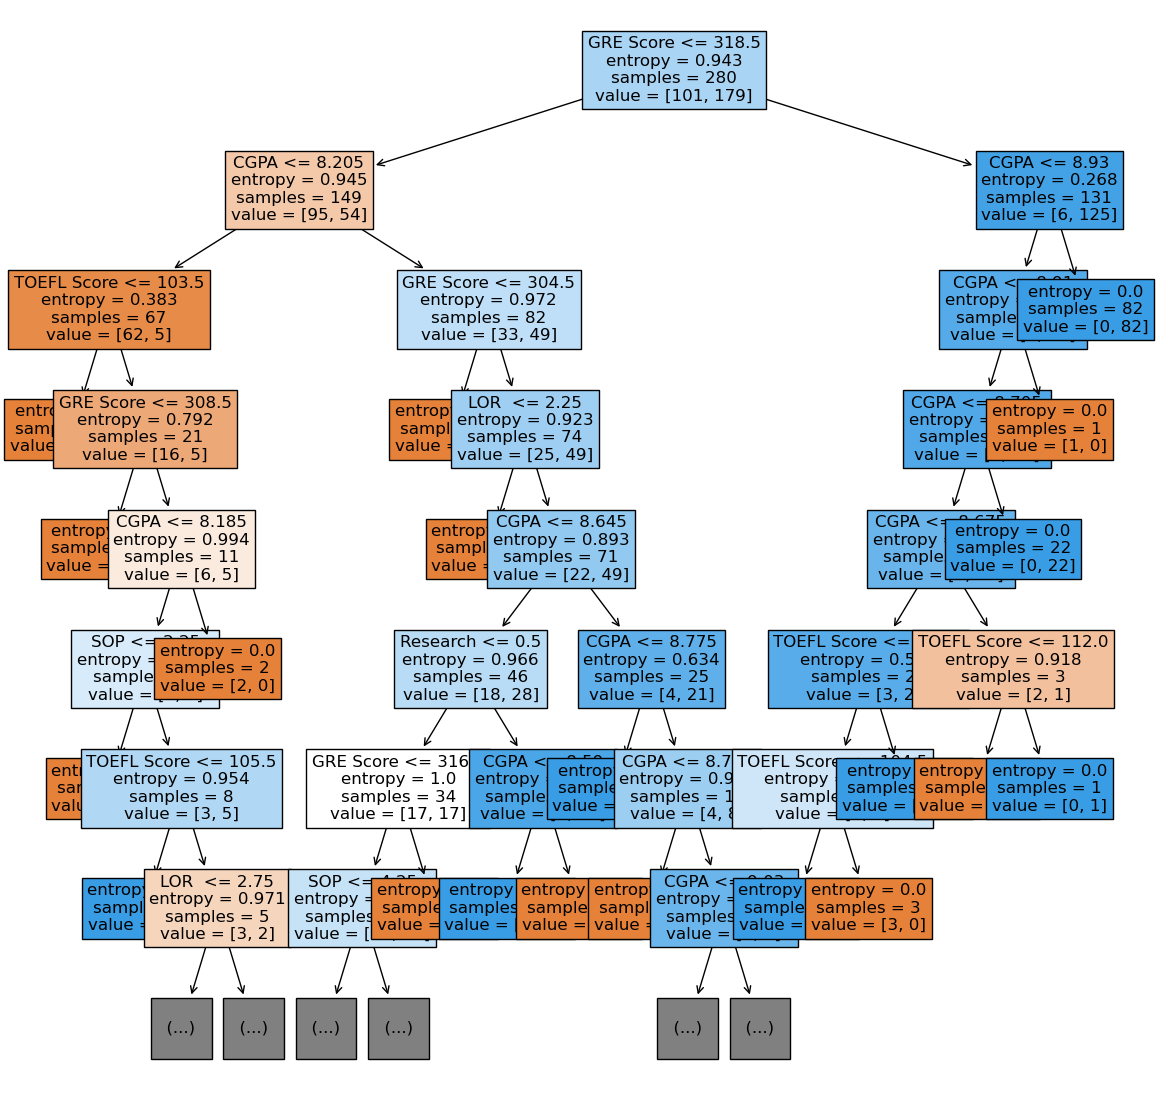

In [16]:
plt.figure(figsize=(14,14))
plot_tree(dt_classifier_entropy,fontsize=12,max_depth=7,filled=True,feature_names=list(X.columns));

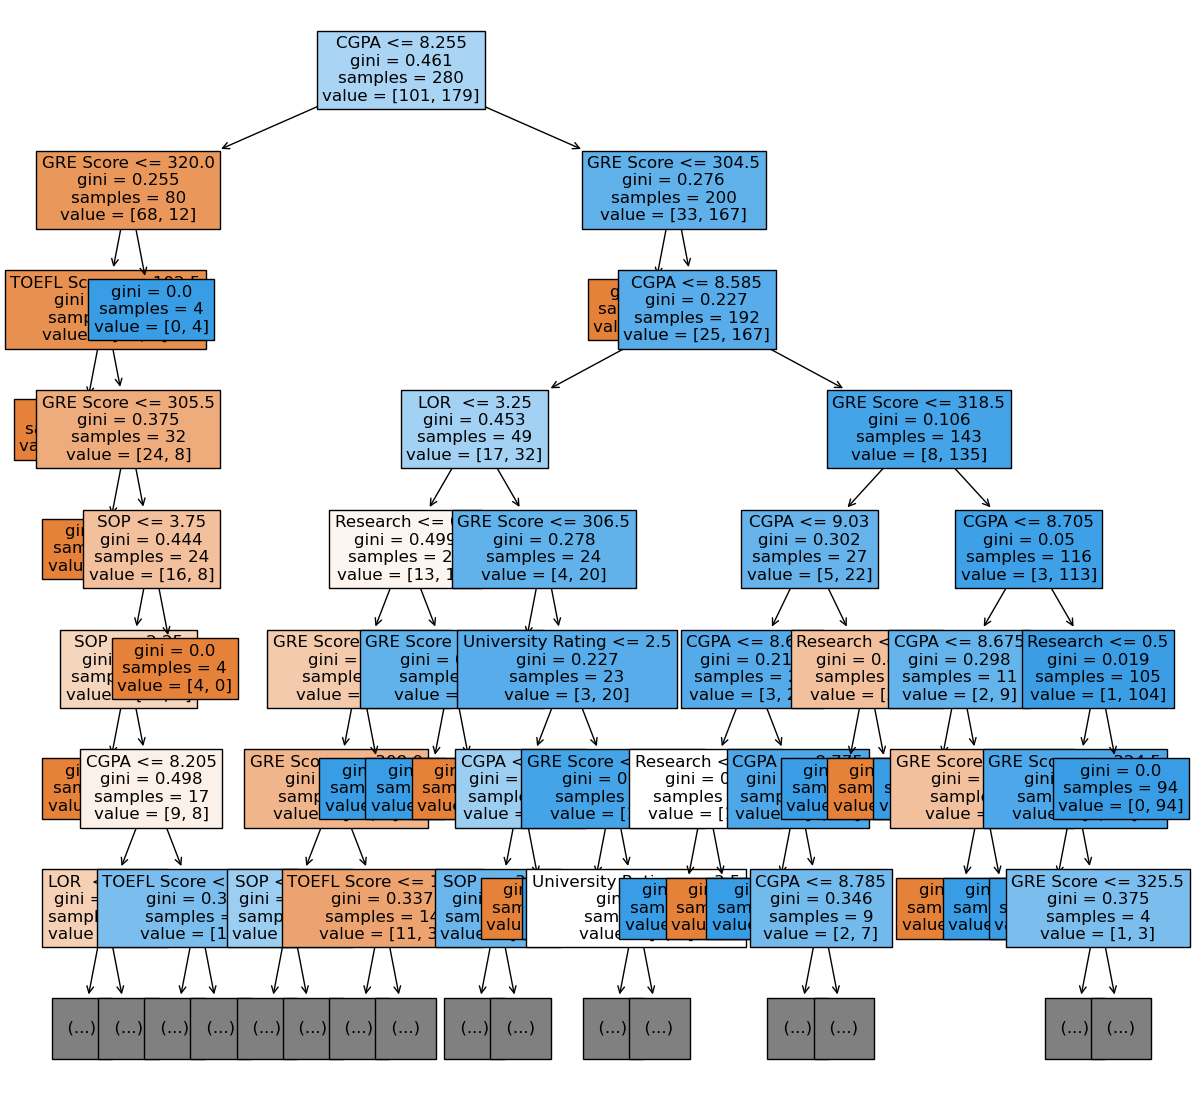

In [17]:
plt.figure(figsize=(14,14))
plot_tree(dt_classifier_gini,fontsize=12,max_depth=7,filled=True,feature_names=list(X.columns));

In [18]:
sample_input = pd.DataFrame({
    'GRE Score': [120],
    'TOEFL Score': [120],
    'University Rating': [5],
    'SOP': [1.2],
    'LOR ': [1.2],
    'CGPA': [6.5],
    'Research': [0]
})

if(dt_classifier_entropy.predict(sample_input)[0] == 1):
    print("Admitted")
else:
    print("Not Admitted")

Not Admitted
